In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
posts = pd.read_csv("covid_instagram.csv")
events = pd.read_csv("events.csv")
posts['Date'] = pd.to_datetime(posts['Date'], format='%m/%d/%Y')
events['start_date'] = pd.to_datetime(events['start_date'])
events['end_date'] = pd.to_datetime(events['end_date'])


In [26]:
def get_event(date):
    for _, row in events.iterrows():
        if row['start_date'] <= date <= row['end_date']:
            return row['event_name']
    return "No event"
posts['event'] = posts['Date'].apply(get_event)

In [27]:
sentiment_by_event = posts.groupby(['event', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_event['positive_share'] = sentiment_by_event['positive'] / sentiment_by_event.sum(axis=1)
sentiment_by_event

Sentiment,negative,neutral,positive,positive_share
event,,,,
Delta variant wave,9007,22219,25479,0.449325
Global lockdowns begin,8183,17998,18914,0.419426
Global vaccination campaigns begin,2193,5209,4587,0.382601
No event,47418,160033,107573,0.341476
Omicron variant detected (South Africa),8282,24300,21575,0.398379
Oxford–AstraZeneca vaccine approved (UK),1342,2809,2438,0.370011
Pfizer–BioNTech vaccine approved (FDA EUA),920,2249,1881,0.372475
WHO declares COVID-19 a pandemic,767,1579,928,0.283445
WHO declares Public Health Emergency of International Concern,511,620,614,0.351862


In [28]:
posts['month'] = posts['Date'].dt.to_period('M')
monthly_sentiment = posts.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)
monthly_sentiment['positive_ratio'] = monthly_sentiment['positive'] / monthly_sentiment.sum(axis=1)

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


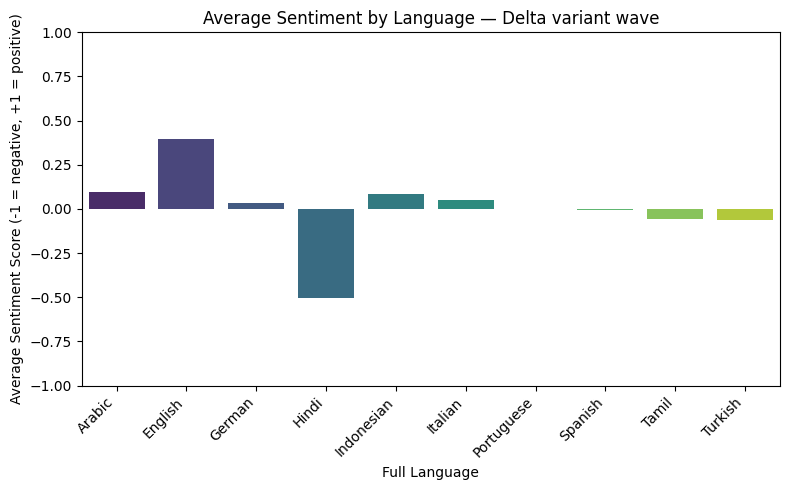

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


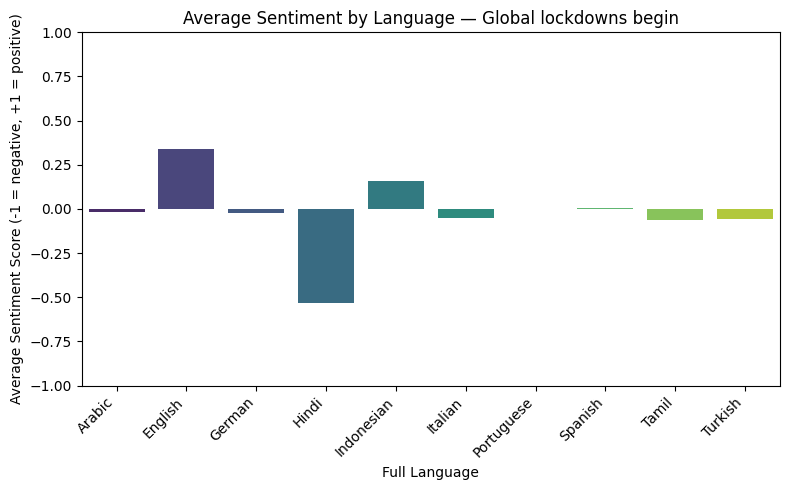

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


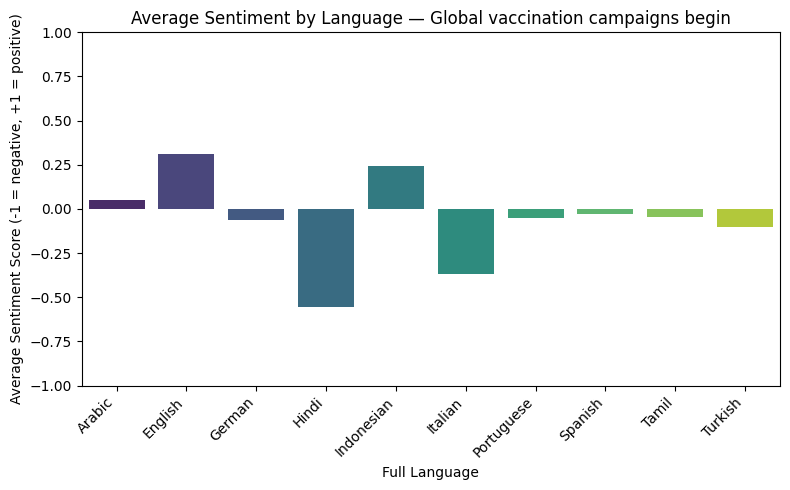

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


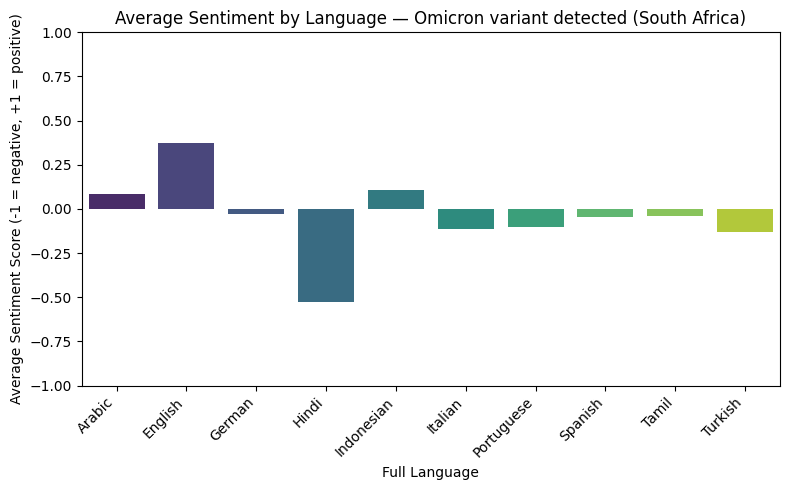

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


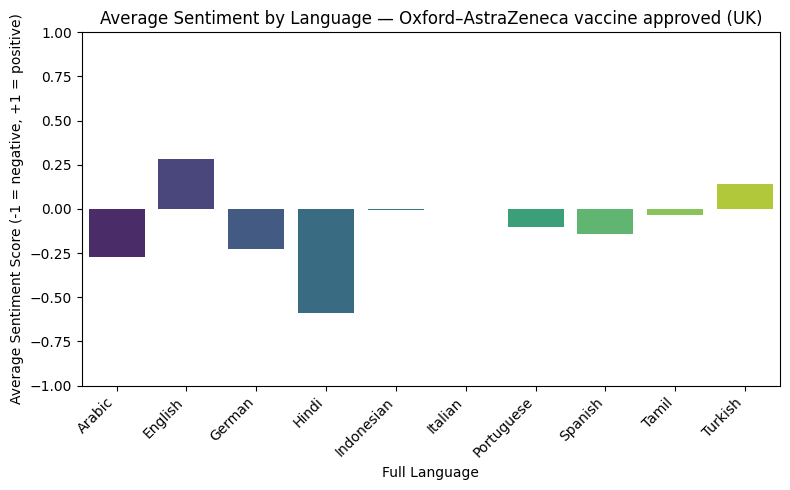

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


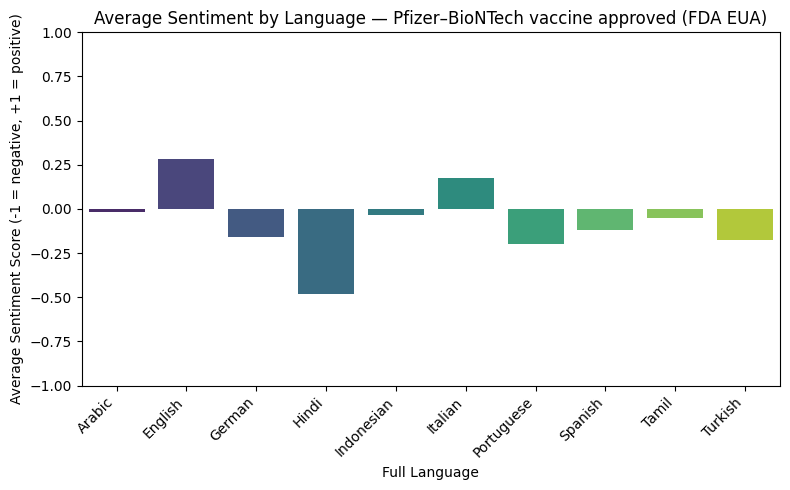

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


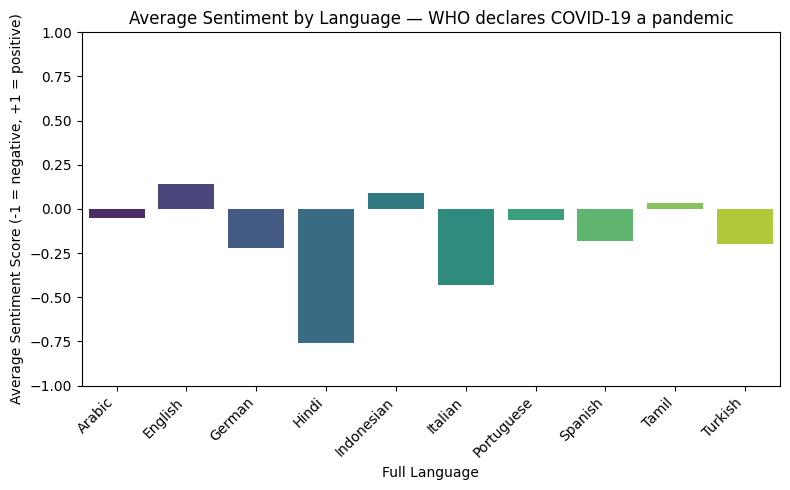

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


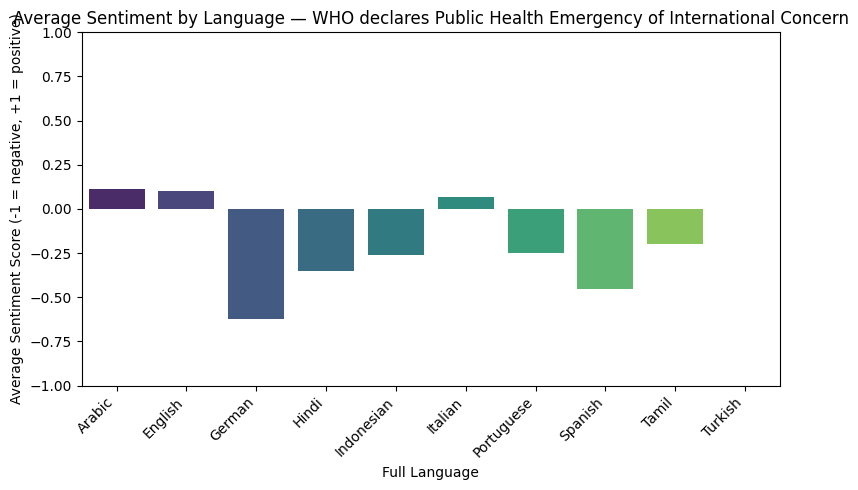

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/3237144776.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


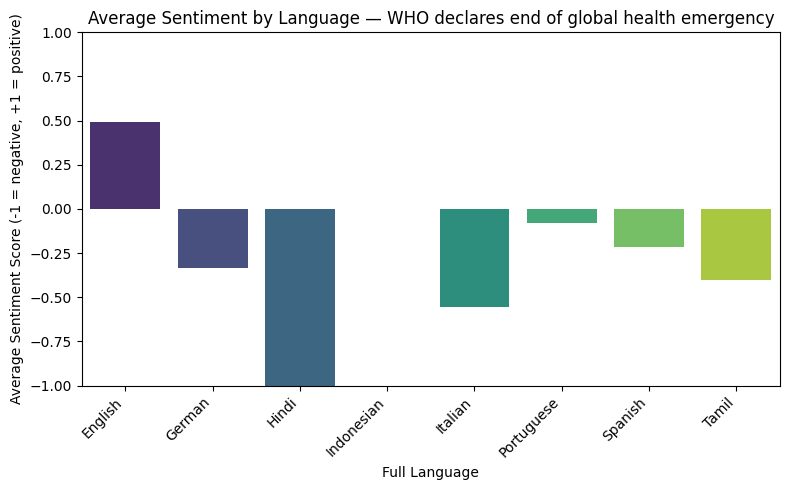

In [29]:
posts['sentiment_score'] = posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
top_countries = (
    posts['Full Language']
    .value_counts()
    .head(10)
    .index
    .tolist()
)
event_posts = posts[posts['event'] != 'No event']
event_posts = event_posts[event_posts['Full Language'].isin(top_countries)]
sentiment_by_event_country = (
    event_posts.groupby(['event', 'Full Language'])['sentiment_score']
    .mean()
    .reset_index()
)
unique_events = sentiment_by_event_country['event'].unique()

for event in unique_events:
    subset = sentiment_by_event_country[sentiment_by_event_country['event'] == event]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=subset,
        x='Full Language',
        y='sentiment_score',
        palette='viridis'
    )
    plt.title(f"Average Sentiment by Language — {event}")
    plt.ylim(-1, 1)
    plt.xlabel("Full Language")
    plt.ylabel("Average Sentiment Score (-1 = negative, +1 = positive)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/2890172182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})


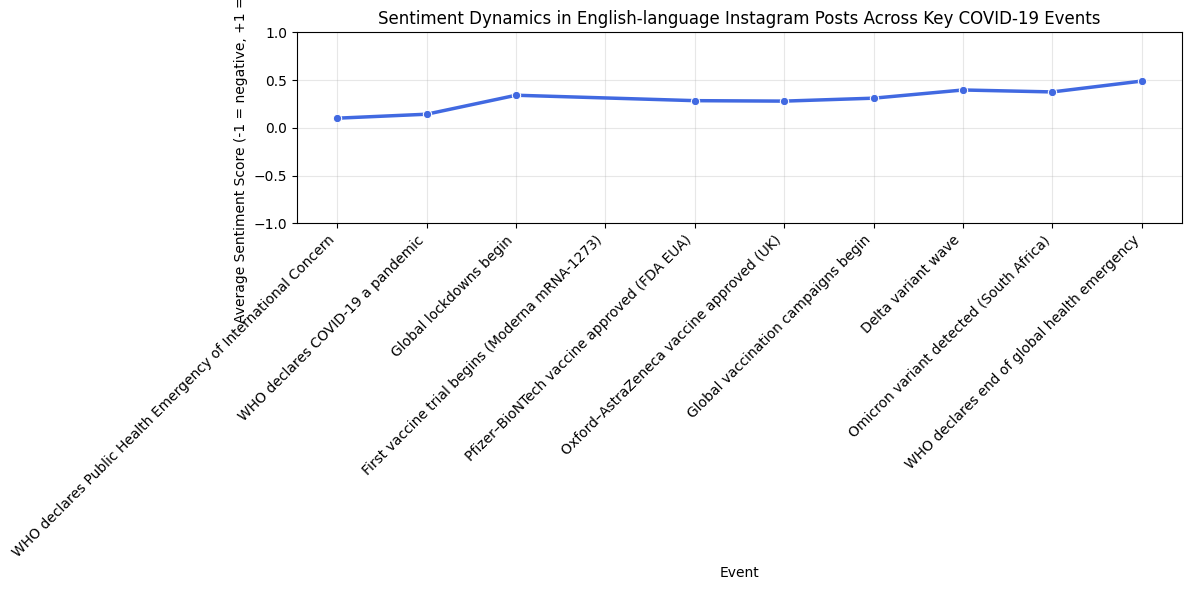

In [30]:
eng_posts = posts[(posts['Language Code'] == 'en') & (posts['event'] != 'No event')]
eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
eng_sentiment_by_event = (
    eng_posts.groupby('event')['sentiment_score']
    .mean()
    .reset_index()
)
event_order = [
    "WHO declares Public Health Emergency of International Concern",
    "WHO declares COVID-19 a pandemic",
    "Global lockdowns begin",
    "First vaccine trial begins (Moderna mRNA-1273)",
    "Pfizer–BioNTech vaccine approved (FDA EUA)",
    "Oxford–AstraZeneca vaccine approved (UK)",
    "Global vaccination campaigns begin",
    "Delta variant wave",
    "Omicron variant detected (South Africa)",
    "WHO declares end of global health emergency"
]

eng_sentiment_by_event['event'] = pd.Categorical(
    eng_sentiment_by_event['event'],
    categories=event_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=eng_sentiment_by_event,
    x='event',
    y='sentiment_score',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)

plt.xticks(rotation=45, ha='right')
plt.title("Sentiment Dynamics in English-language Instagram Posts Across Key COVID-19 Events")
plt.xlabel("Event")
plt.ylabel("Average Sentiment Score (-1 = negative, +1 = positive)")
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/1218354538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})


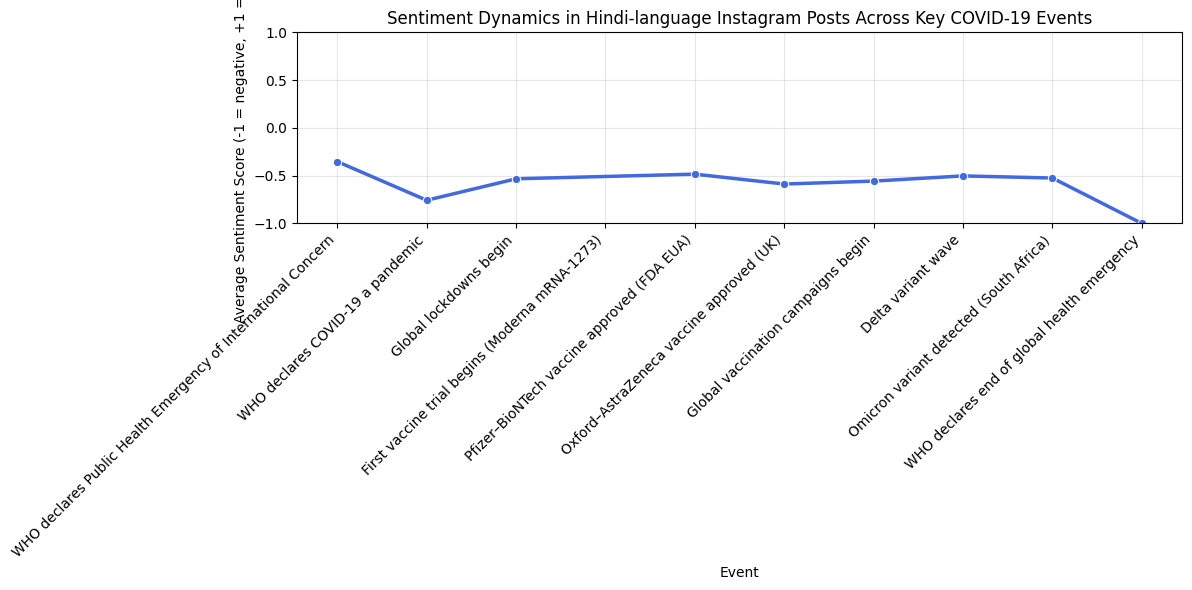

In [31]:
eng_posts = posts[(posts['Full Language'] == 'Hindi') & (posts['event'] != 'No event')]
eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
eng_sentiment_by_event = (
    eng_posts.groupby('event')['sentiment_score']
    .mean()
    .reset_index()
)
event_order = [
    "WHO declares Public Health Emergency of International Concern",
    "WHO declares COVID-19 a pandemic",
    "Global lockdowns begin",
    "First vaccine trial begins (Moderna mRNA-1273)",
    "Pfizer–BioNTech vaccine approved (FDA EUA)",
    "Oxford–AstraZeneca vaccine approved (UK)",
    "Global vaccination campaigns begin",
    "Delta variant wave",
    "Omicron variant detected (South Africa)",
    "WHO declares end of global health emergency"
]

eng_sentiment_by_event['event'] = pd.Categorical(
    eng_sentiment_by_event['event'],
    categories=event_order,
    ordered=True
)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=eng_sentiment_by_event,
    x='event',
    y='sentiment_score',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.xticks(rotation=45, ha='right')
plt.title("Sentiment Dynamics in Hindi-language Instagram Posts Across Key COVID-19 Events")
plt.xlabel("Event")
plt.ylabel("Average Sentiment Score (-1 = negative, +1 = positive)")
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_11526/2665307623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})


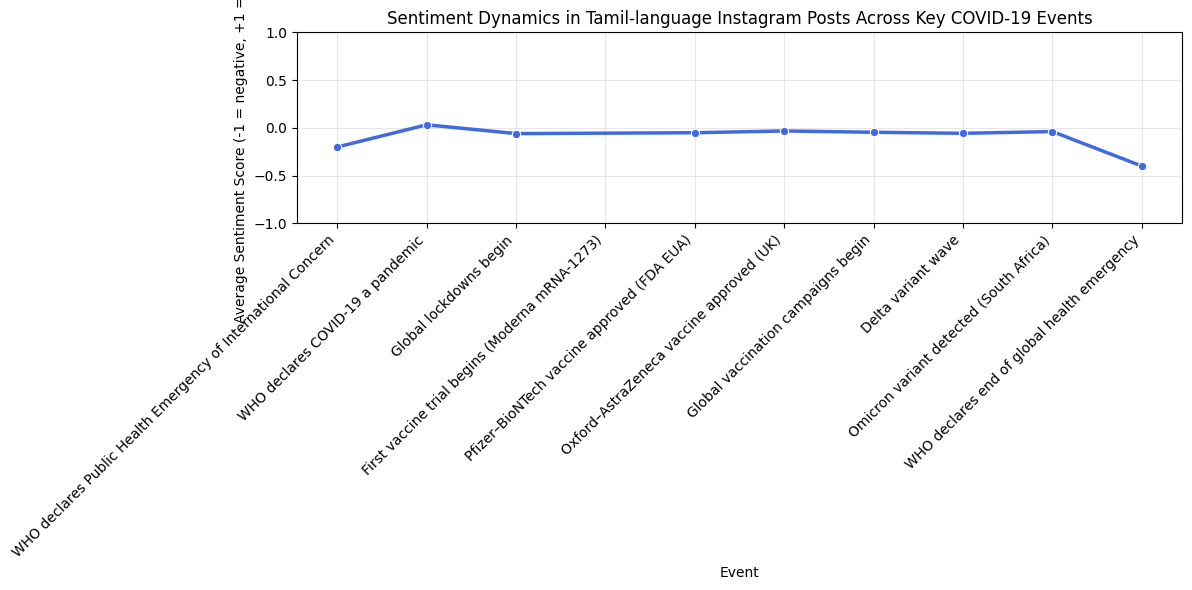

In [32]:
eng_posts = posts[(posts['Full Language'] == 'Tamil') & (posts['event'] != 'No event')]
eng_posts['sentiment_score'] = eng_posts['Sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
eng_sentiment_by_event = (
    eng_posts.groupby('event')['sentiment_score']
    .mean()
    .reset_index()
)
event_order = [
    "WHO declares Public Health Emergency of International Concern",
    "WHO declares COVID-19 a pandemic",
    "Global lockdowns begin",
    "First vaccine trial begins (Moderna mRNA-1273)",
    "Pfizer–BioNTech vaccine approved (FDA EUA)",
    "Oxford–AstraZeneca vaccine approved (UK)",
    "Global vaccination campaigns begin",
    "Delta variant wave",
    "Omicron variant detected (South Africa)",
    "WHO declares end of global health emergency"
]

eng_sentiment_by_event['event'] = pd.Categorical(
    eng_sentiment_by_event['event'],
    categories=event_order,
    ordered=True
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=eng_sentiment_by_event,
    x='event',
    y='sentiment_score',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.xticks(rotation=45, ha='right')
plt.title("Sentiment Dynamics in Tamil-language Instagram Posts Across Key COVID-19 Events")
plt.xlabel("Event")
plt.ylabel("Average Sentiment Score (-1 = negative, +1 = positive)")
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()